In [1]:
import os
import sys
import json
import pathlib
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

os.chdir('./../../')
from src.core.preprocessing import Preprocessing


In [2]:
file_path = './data/'

In [3]:
excel_file = pd.ExcelFile(pathlib.Path(file_path, 'train.xlsx'))
train_df = pd.read_excel(excel_file, 0, dtype=str)

excel_file = pd.ExcelFile(pathlib.Path(file_path, 'val.xlsx'))
val_df = pd.read_excel(excel_file, 0, dtype=str)

excel_file = pd.ExcelFile(pathlib.Path(file_path, 'test.xlsx'))
test_df = pd.read_excel(excel_file, 0, dtype=str)


In [4]:
train_df

,file_name,old_category,content,quantity,category,length_content
0,Autronica - bs320cn.pdf,54,AutroSafe Betjeningspanel ...,287,54,10497
1,320.01 Geberit Mepla.pdf,32,FDV dokument Geberit Mepla Beskrivelse:\n ...,194,32,3573
2,261.01 Lett-Tak datablad papp.pdf,26,TEKNISK DATABLAD FOR ASFAL...,93,others,3772
3,434.XX SXWTBASW110002 Bakplate til AS-P.pdf,43,Product data sheet SXWTBASW110002Spa...,925,43,6051
4,434.01 Tavlekomponenter NISE -3140MP2E.pdf,43,NISE 3140/3140E Int...,925,43,5411
...,...,...,...,...,...,...
7694,243.09 Skilt 8623.pdf,24,190 .............................................,608,24,1886
7695,570.01 Integrert kommunikasjon - Patchpaneler ...,57,Tilbehør - Patchpaneler Telesafe tilbyr en ...,129,57,2266
7696,Dr.gt.2 Risikovurdering sluttkontroll mindre j...,40,Risikovurdering og sluttkontroll for mindre ...,890,40,4233
7697,Power - EL 610 2412.pdf,546,TEKNISK DOKUMENTASJON EL610-2412\n ...,76,others,11071


In [5]:
train_df['category'].value_counts()

category
11        1092
others     937
43         740
40         712
36         619
24         486
44         324
25         271
56         242
54         230
23         227
27         206
31         191
29         187
62         172
19         165
32         155
33         148
35         116
41         115
57         103
61          94
15          84
47          83
Name: count, dtype: int64

## Preprocessing text

In [6]:
apply_preprocessing = False
if apply_preprocessing:
    train_df['preprocessed_content'] = train_df['content'].apply(lambda x: Preprocessing().clean(x))
    val_df['preprocessed_content'] = val_df['content'].apply(lambda x: Preprocessing().clean(x))
    test_df['preprocessed_content'] = test_df['content'].apply(lambda x: Preprocessing().clean(x))
else:
    train_df['preprocessed_content'] = train_df['content']
    val_df['preprocessed_content'] = val_df['content']
    test_df['preprocessed_content'] = test_df['content']


In [7]:
test_df

,file_name,old_category,content,quantity,category,length_content,preprocessed_content
0,Brannkonsept AKG51.pdf,19,Brannkonsept Akersgata 51\n ...,206,19,39245,Brannkonsept Akersgata 51\n ...
1,V15 F30.pdf,24,Dører i Nordia vegger Side 1/...,608,24,1822,Dører i Nordia vegger Side 1/...
2,542.01 Visio-Topologi brannalarmanlegg OD.vsd.pdf,54,1 2 3 ...,287,54,5059,1 2 3 ...
3,60a61074cfda2.pdf,11,#12-181: Arbeid i høyden Generell inform...,1365,11,2007,#12-181: Arbeid i høyden Generell inform...
4,Tork Toalettrull.pdf,27,Tork Dispenser Mini Jumbo Toalettrull\n ...,258,27,1662,Tork Dispenser Mini Jumbo Toalettrull\n ...
...,...,...,...,...,...,...,...
1150,291.02 Befaringsliste 1 etg fløy A.pdf,29,Befaringsliste Oppdragsgiver: Strøm Gundersen ...,234,29,18760,Befaringsliste Oppdragsgiver: Strøm Gundersen ...
1151,254.02 FIORDO Ocean Cambrian - gulvfliser.pdf,25,60x60 45x45 30x60 24”x24” 18”x18...,339,25,8114,60x60 45x45 30x60 24”x24” 18”x18...
1152,434.28 Enlinjeskjema A-U323-434.28 (56).pdf,43,"Rønning Elektro AS Prosjekt ODN, Tav...",925,43,3339,"Rønning Elektro AS Prosjekt ODN, Tav..."
1153,231.01 Fliser fra Modena - yttervegg.pdf,23,MODENA MUR & BYGG\n ...,284,23,7715,MODENA MUR & BYGG\n ...


## Filter only columns to be used and encode labels

In [8]:
filtered_train_df = train_df[['category', 'preprocessed_content']]
filtered_train_df = filtered_train_df.dropna()
filtered_train_df.head()

,category,preprocessed_content
0,54,AutroSafe Betjeningspanel ...
1,32,FDV dokument Geberit Mepla Beskrivelse:\n ...
2,others,TEKNISK DATABLAD FOR ASFAL...
3,43,Product data sheet SXWTBASW110002Spa...
4,43,NISE 3140/3140E Int...


In [9]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(filtered_train_df['category'])
filtered_train_df.loc[:, 'encoded_category'] = label_encoder.transform(filtered_train_df['category'])
filtered_train_df.head()

,category,preprocessed_content,encoded_category
0,54,AutroSafe Betjeningspanel ...,18
1,32,FDV dokument Geberit Mepla Beskrivelse:\n ...,9
2,others,TEKNISK DATABLAD FOR ASFAL...,23
3,43,Product data sheet SXWTBASW110002Spa...,15
4,43,NISE 3140/3140E Int...,15


In [10]:
# Mapping class encoded with category
filtered_train_df.groupby(['category', 'encoded_category']).count()

,,preprocessed_content
category,encoded_category,
11,0,1092
15,1,84
19,2,165
23,3,227
24,4,486
25,5,271
27,6,206
29,7,186
31,8,191


In [11]:
X_train = filtered_train_df['preprocessed_content']
y_train = filtered_train_df['encoded_category']

In [12]:
filtered_val_df = val_df[['category', 'preprocessed_content']]
filtered_val_df = filtered_val_df.dropna()
filtered_val_df.loc[:, 'encoded_category'] = label_encoder.transform(filtered_val_df['category'])
X_val = filtered_val_df['preprocessed_content']
y_val = filtered_val_df['encoded_category']

filtered_test_df = test_df[['category', 'preprocessed_content']]
filtered_test_df = filtered_test_df.dropna()
filtered_test_df.loc[:, 'encoded_category'] = label_encoder.transform(filtered_test_df['category'])
X_test = filtered_test_df['preprocessed_content']
y_test = filtered_test_df['encoded_category']

In [13]:
X_test

0       Brannkonsept Akersgata   51\n                 ...
1       Dører i Nordia vegger                  Side 1/...
2       1                  2                  3       ...
3       #12-181:    Arbeid   i høyden Generell  inform...
4       Tork Dispenser Mini Jumbo  Toalettrull\n      ...
                              ...                        
1150    Befaringsliste Oppdragsgiver: Strøm Gundersen ...
1151    60x60      45x45      30x60 24”x24”     18”x18...
1152    Rønning Elektro AS           Prosjekt ODN, Tav...
1153    MODENA        MUR    &  BYGG\n                ...
1154    Avsender: Trondheim kommune\n        Byggesaks...
Name: preprocessed_content, Length: 1155, dtype: object

## Hyperparameters tuning


In [14]:


split_index = [-1]*len(X_train) + [0]*len(X_val)
X = pd.concat([X_train, X_val], axis=0)
y = pd.concat([y_train, y_val], axis=0)
pds = PredefinedSplit(test_fold = split_index)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char')),
    ('clf', LinearSVC(dual=False, class_weight='balanced', random_state=42)),
])
parameters = {
    'tfidf__max_features': (100, 1000, 10000),
    'tfidf__ngram_range': ((1,1), (1,2), (1,3)),
    'clf__C': (1, 10, 100)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=pds, n_jobs=-1, verbose=3)
#grid_search_tune.fit(X, y)

print("Best parameters set:")
#print(grid_search_tune.best_estimator_.steps)


Best parameters set:


## Training 

In [15]:

tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    max_features=10000
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
X_train_tfidf.shape


(7697, 10000)

In [17]:

clf = LinearSVC(C=1, dual=False, class_weight='balanced', random_state=42)

Text(0.5, 1.0, 'Learning Curve for LinearSVC')

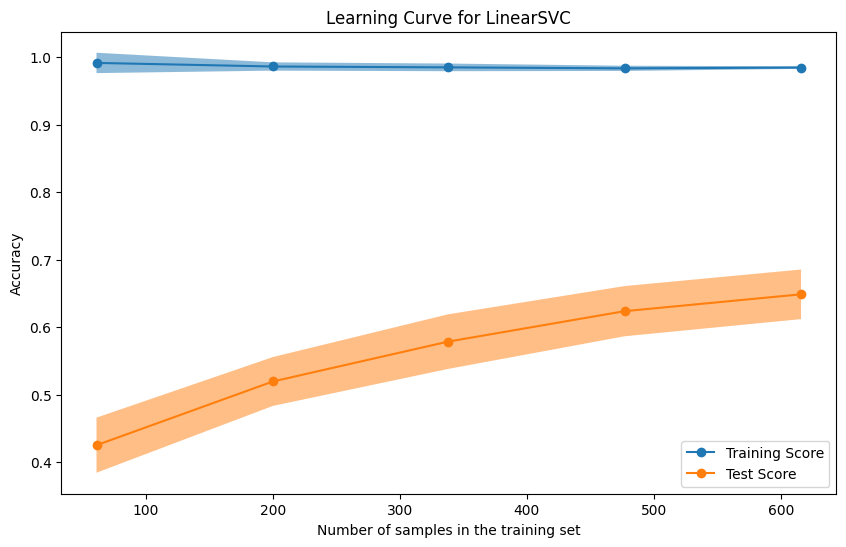

In [18]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

common_params = {
    "X": X_val_tfidf,
    "y": y_val,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(clf, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {clf.__class__.__name__}")

The training score remains high regardless of the size of the training set. On the other hand, the test score increases with the size of the training dataset. Indeed, it increases up to a point where it reaches a plateau. Observing such a plateau is an indication that it might not be useful to acquire new data to train the model since the generalization performance of the model will not increase anymore



In [19]:
model = clf.fit(X_train_tfidf, y_train)

top 5 keywords per class:
         0       1       2      3     4     5      6      7     8     9   ...  \
0       jeg      er      er     og   med   med  eller     av  ikke    og  ...   
1  arbeidet      av    ikke    kan    og    er    med    the    10   til  ...   
2       for     det    skal     as   for    en    kan     og    nr  skal  ...   
3       nei     cid  tiltak     12    mm  skal     du  eller    er   for  ...   
4     tcpdf  tiltak      må  eller  side    mm    har     16   med    80  ...   

     14             15     16     17   18     19  20   21  22   23  
0    13             16    med     er  nei    nei  13   11  er   av  
1    no             en  eller  eller   er    til  40  the  på  til  
2   for             10    and    til  kan    434  01   de  du   og  
3    mm  dokumentasjon     hf   2020  som     50  mm   og  12  for  
4  side            2x2    fax     00   ja  eller  21  nei  of   as  

[5 rows x 24 columns]


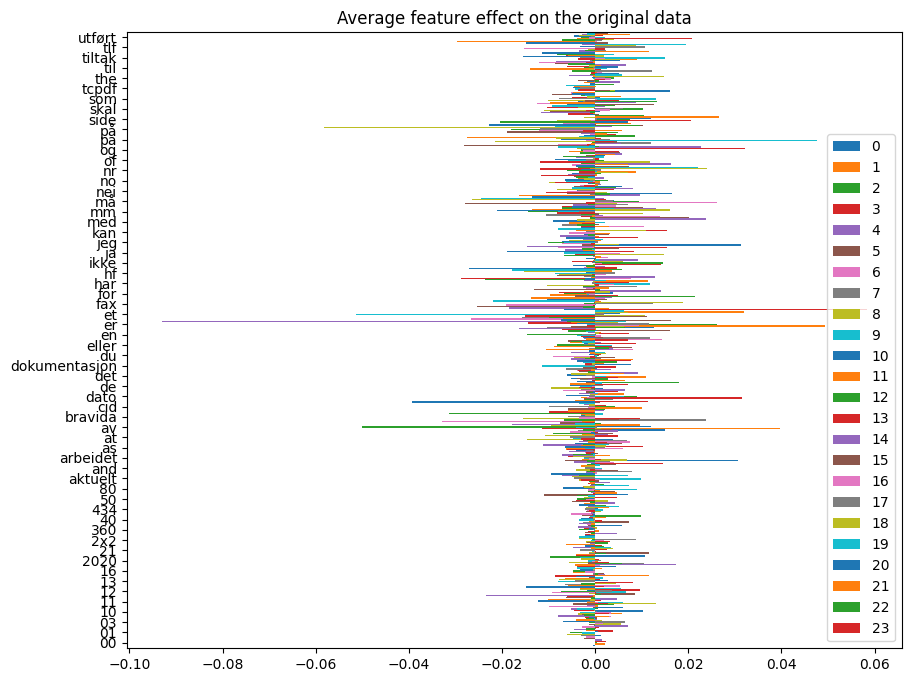

In [20]:
target_names = filtered_train_df['encoded_category'].sort_values().unique()
feature_names = tfidf_vectorizer.get_feature_names_out()

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train_tfidf.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.85
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

In [21]:
y_train_pred = model.predict(X_train_tfidf)

print(
    f"Classification report for classifier {clf}:\n"
    f"{classification_report(y_train, y_train_pred)}\n"
)

Classification report for classifier LinearSVC(C=1, class_weight='balanced', dual=False, random_state=42):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1092
           1       0.89      1.00      0.94        84
           2       0.93      0.95      0.94       165
           3       0.97      0.97      0.97       227
           4       0.97      0.97      0.97       486
           5       0.94      0.97      0.96       271
           6       1.00      0.98      0.99       206
           7       0.98      0.99      0.99       186
           8       0.97      0.96      0.97       191
           9       0.82      0.92      0.87       155
          10       0.98      0.99      0.99       148
          11       0.84      0.97      0.90       116
          12       0.97      0.92      0.95       619
          13       1.00      0.97      0.98       712
          14       0.93      0.97      0.95       115
          15       0.99     

## Evaluation

[Text(0, 0, '164'),
 Text(0, 0, '13'),
 Text(0, 0, '25'),
 Text(0, 0, '34'),
 Text(0, 0, '73'),
 Text(0, 0, '41'),
 Text(0, 0, '31'),
 Text(0, 0, '28'),
 Text(0, 0, '28'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '17'),
 Text(0, 0, '93'),
 Text(0, 0, '107'),
 Text(0, 0, '17'),
 Text(0, 0, '111'),
 Text(0, 0, '48'),
 Text(0, 0, '13'),
 Text(0, 0, '34'),
 Text(0, 0, '37'),
 Text(0, 0, '16'),
 Text(0, 0, '14'),
 Text(0, 0, '26'),
 Text(0, 0, '140')]

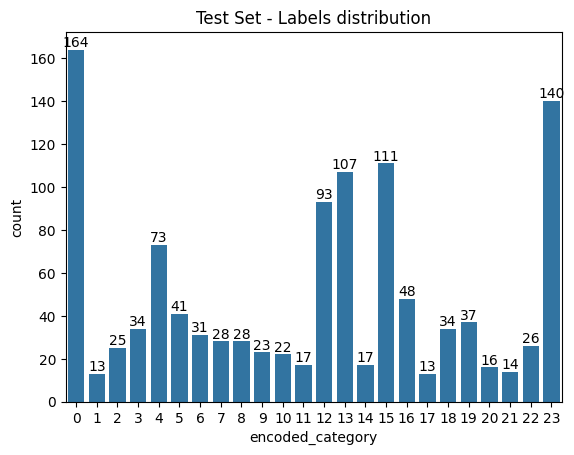

In [22]:
ax = sns.countplot(filtered_test_df, x="encoded_category")
ax.set_title("Test Set - Labels distribution")
ax.bar_label(ax.containers[0])

In [23]:
y_pred = model.predict(X_test_tfidf)


Classification report for classifier LinearSVC(C=1, class_weight='balanced', dual=False, random_state=42):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       164
           1       0.79      0.85      0.81        13
           2       0.86      0.72      0.78        25
           3       0.65      0.50      0.57        34
           4       0.73      0.84      0.78        73
           5       0.68      0.93      0.78        41
           6       0.78      0.81      0.79        31
           7       0.93      0.93      0.93        28
           8       0.80      0.71      0.75        28
           9       0.60      0.78      0.68        23
          10       0.77      0.91      0.83        22
          11       0.52      0.71      0.60        17
          12       0.93      0.82      0.87        93
          13       0.97      0.97      0.97       107
          14       0.71      0.88      0.79        17
          15       0.89     

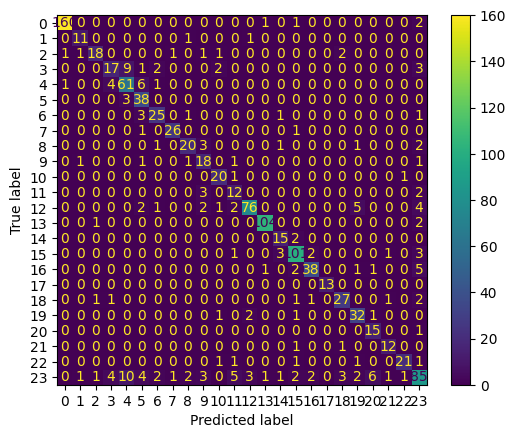

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(
    f"Classification report for classifier {clf}:\n"
    f"{classification_report(y_test, y_pred)}\n"
)
